# Bản đồ có điểm thưởng

In [1]:
%matplotlib inline
%cd ../../source
from Graph import Graph
from searching_algorithms import *
from heuristic_func import euclide_heuristic, manhattan_heuristic
from bonus_wrapper import *

/home/hiraki/source/IntroAI/Project01/source


Với trường hợp này, em đã nghĩ ra một phương án tạm thời đó là em sẽ lập một đồ thị chỉ bao gồm đỉnh bắt đầu, kết thúc và các điểm thưởng (tạm gọi là đồ thị định hướng). Gọi $w(u, v)$ trọng số cạnh nối từ đỉnh $u$ vào $v$ trên đồ thị, $d(u, v)$ là khoảng cách giữa 2 đỉnh $u$, $v$ trên mê cung. Giả sử $v$ là đỉnh điểm thưởng có giá trị là $b(v)$. 
- $w(u, v) = d(u, v) + b(v)$. 
- $w(v, u) = d(u, v) + b(u)$. 

Trong đó $b(u) < 0, b(v) < 0$. 

Ngoài ra, từ đỉnh `START` chỉ có các cạnh đi ra đến tất cả các đỉnh khác, **không** bao gồm `END` (mục đích là để bắt buộc thuật toán phải ăn ít nhất 1 điểm thưởng). Tại `END` chỉ có các cạnh đi vào.

Sau khi xây dựng xong đồ thị định hướng, em sẽ chạy trước thuật toán tìm kiếm trước trên đồ thị này nhằm tìm ra phương án ăn các điểm thưởng sao cho tối ưu nhất (**một cách ước lượng**, sử dụng heuristic để đánh giá). "Tối ưu" như thế nào còn tùy thuộc vào thuật toán là Greedy hay A*.

Ngoài ra, giải thuật này của em sẽ tránh được tình trạng các ô bị đi vào 2 lần để ăn điểm thưởng. Nếu không có đường đi từ điểm thưởng nào đó đến đích, nó sẽ lùi lại và đi đường khác. Giải thuật được cài đặt ở file `bonus_wrapper.py`.

Em sẽ không chạy bản đồ có điểm thưởng với DFS và BFS vì về mặt lý thuyết thì các thuật toán này không thể "nhìn trước" được bản đồ nên cũng không lên kế hoạch gì được. Nó cũng không quan tâm đến trọng số nên em nghĩ cũng không có phương pháp heuristic gì cho các thuật toán này.

In [2]:
# Hàm client để chạy thuật toán tìm kiếm
def run_search_bonus(g: Graph, algorithm, heuristic, figsize=(5, 3)):
    # g: đồ thị được đọc vào 
    # algorithm: con trỏ đến hàm tìm kiếm cần chạy
    
    # Xây dựng đồ thị định hướng
    routing_graph = make_routing_graph(g, heuristic)
    # Chạy thuật toán tìm kiếm trên đồ thị này 
    algorithm(routing_graph, heuristic)
    # Lấy ra danh sách các chặng 
    journey, _ = routing_graph.get_path()
    print('Journey', journey)
    # Chạy thuật toán trên từng chặng 
    g.clear()
    def wrapped_algo(g, s, e, custom_visited):
        return algorithm(g, heuristic, s, e, custom_visited)
    journey_data = bonus_traversal_wrapper(g, wrapped_algo, journey)
    # Lấy ra đường đi
    visited, path, cost = process_journey(g, journey_data)
    #print('Path length', len(path))
    # Vẽ 
    g.visualize(path, visited=visited, figsize=figsize)
    print('Cost:', cost)

## Bản đồ 1 (3 điểm, 8x17)

In [3]:
g1 = Graph('testcases/bonus1.txt')

Graph initialized from maze with size 8 x 17


### Greedy Best First Search (Manhattan)

Journey [(5, 13), (3, 1), (7, 1)]
Going from (5, 13) to (3, 1)
Result found! Keep going!
Going from (3, 1) to (7, 1)
Result found! Keep going!


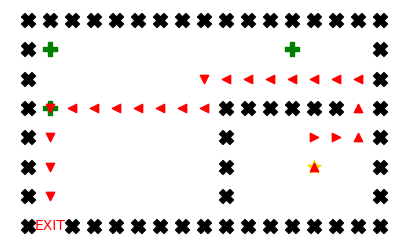

Starting point (x, y) = (5, 13)
Ending point (x, y) = (7, 1)
Bonus point at position (x, y) = (1, 1) with point -10
Bonus point at position (x, y) = (1, 12) with point -2
Bonus point at position (x, y) = (3, 1) with point -5
Cost: 19


In [4]:
run_search_bonus(g1, GBFS, manhattan_heuristic)

Bản thân chiến thuật heuristic của GBFS là tham lam chọn đường gần đích nhất. Mà đường từ điểm bắt đầu cho đến đích có đường gần nhất là... đi thẳng, không ăn bất cứ điểm thưởng nào. Đó là lý do với phương pháp này, em bắt buộc phải cho thuật toán ăn ít nhất 1 điểm thưởng.

### Greedy Best First Search (Euclide)

Journey [(5, 13), (3, 1), (7, 1)]
Going from (5, 13) to (3, 1)
Result found! Keep going!
Going from (3, 1) to (7, 1)
Result found! Keep going!


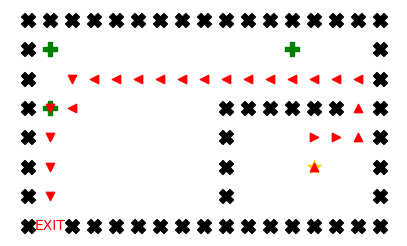

Starting point (x, y) = (5, 13)
Ending point (x, y) = (7, 1)
Bonus point at position (x, y) = (1, 1) with point -10
Bonus point at position (x, y) = (1, 12) with point -2
Bonus point at position (x, y) = (3, 1) with point -5
Cost: 19


In [5]:
run_search_bonus(g1, GBFS, euclide_heuristic)

Với heuristic là Euclide, chi phí vẫn vậy, đường đi có hơi khác một chút.

Qua 2 ví dụ trên, ta thấy được có một điểm thưởng có giá trị khá lớn là `-10`. Tuy nhiên, GBFS đã bỏ lỡ mất điểm thưởng này.

### A* (Manhattan)

Journey [(5, 13), (1, 1), (7, 1)]
Going from (5, 13) to (1, 1)
Result found! Keep going!
Going from (1, 1) to (7, 1)
Result found! Keep going!


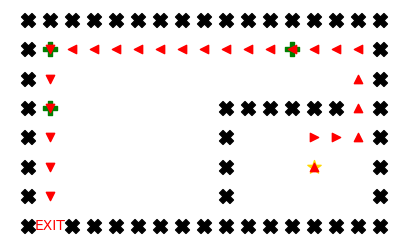

Starting point (x, y) = (5, 13)
Ending point (x, y) = (7, 1)
Bonus point at position (x, y) = (1, 1) with point -10
Bonus point at position (x, y) = (1, 12) with point -2
Bonus point at position (x, y) = (3, 1) with point -5
Cost: 9


In [6]:
run_search_bonus(g1, Astar, manhattan_heuristic)

A* đã chọn phương án ăn tất cả các điểm thưởng, và đương nhiên đây cũng chính là phương án tối thiểu hóa chi phí đường đi trong bản đồ này. Lý do là vì A* là một thuật toán *complete*, nên nó sẽ luôn tìm được đường đi ngắn nhất nếu đường đi này có tồn tại.

Do hàm heuristic là Euclide hay Manhattan không ảnh hưởng quá lớn đến A* nên với phương pháp 1, em sẽ chỉ chạy A* với 1 hàm heuristic.

Tổng kết cho bản đồ 1:

| Thuật toán | Chi phí |
|------------|---------|
| GBFS (M)   | 19      |
| GBFS (E)   | 19      |
| A* (M)     | 9       |

## Bản đồ 2 (5 điểm, 21x31)

In [7]:
g2 = Graph('testcases/bonus2.txt')

Graph initialized from maze with size 21 x 31


### Greedy Best-first Search (Manhattan)

Journey [(1, 1), (16, 19), (19, 30)]
Going from (1, 1) to (16, 19)
Result found! Keep going!
Going from (16, 19) to (19, 30)
Result not found, backtracking...
Going from (1, 1) to (19, 30)
Result found! Keep going!


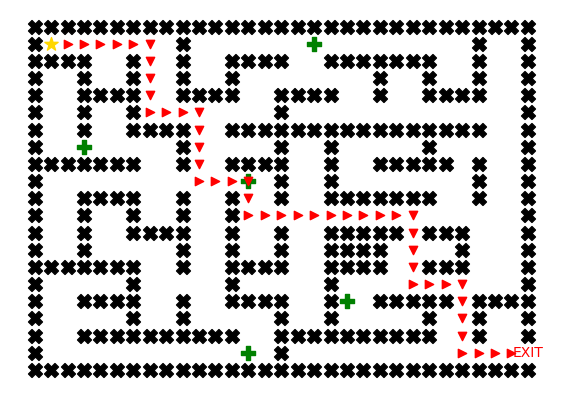

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (7, 3) with point -6
Bonus point at position (x, y) = (9, 13) with point -1
Bonus point at position (x, y) = (16, 19) with point -5
Bonus point at position (x, y) = (1, 17) with point -20
Cost: 46


In [8]:
run_search_bonus(g2, GBFS, manhattan_heuristic, figsize=(7, 5))

Nhìn vào log, ta thấy được GBFS đã chọn đường đi từ `START` đến ô điểm thưởng `(16, 19)`. Tuy nhiên từ ô này không đi được đến đích nên nó đã bỏ ô đó. Nó đã đi một mạch từ `START` đến `END` và trên đường đi, vô tình ăn luôn ô điểm thưởng `(9, 13)`. Do tham lam đến đích, nó đã bỏ qua mất điểm thưởng lớn là `(1, 17)`.

### Greedy Best-first Search (Euclide)

Journey [(1, 1), (16, 19), (19, 30)]
Going from (1, 1) to (16, 19)
Result found! Keep going!
Going from (16, 19) to (19, 30)
Result not found, backtracking...
Going from (1, 1) to (19, 30)
Result found! Keep going!


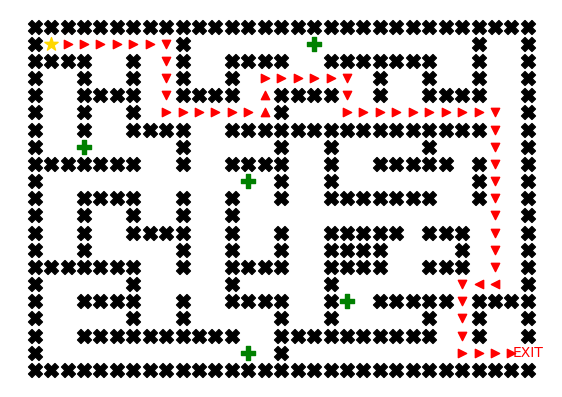

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (7, 3) with point -6
Bonus point at position (x, y) = (9, 13) with point -1
Bonus point at position (x, y) = (16, 19) with point -5
Bonus point at position (x, y) = (1, 17) with point -20
Cost: 55


In [9]:
run_search_bonus(g2, GBFS, euclide_heuristic, figsize=(7, 5))

Với heuristic là Euclide, nó đã chọn một đường đi khác và lần này nó đã không ăn may được như lần trước nữa. Trên đường đi nó không vô tình ăn được điểm thưởng nào cả.

### A* (Manhattan)

Journey [(1, 1), (1, 17), (19, 30)]
Going from (1, 1) to (1, 17)
Result found! Keep going!
Going from (1, 17) to (19, 30)
Result found! Keep going!


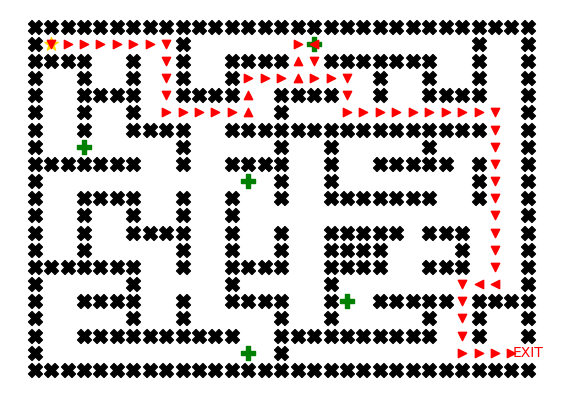

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (7, 3) with point -6
Bonus point at position (x, y) = (9, 13) with point -1
Bonus point at position (x, y) = (16, 19) with point -5
Bonus point at position (x, y) = (1, 17) with point -20
Cost: 39


In [10]:
run_search_bonus(g2, Astar, manhattan_heuristic, figsize=(7, 5))

Như thường lệ, A* đã tìm được đường đi ngắn nhất.

| Thuật toán | Chi phí |
|------------|---------|
| GBFS (M)   | 46      |
| GBFS (E)   | 55      |
| A* (M)     | 39      |

## Bản đồ 3 (10 điểm, 31x71)

In [11]:
g3 = Graph('testcases/bonus3.txt')

Graph initialized from maze with size 31 x 71


### Greedy Best-first Search (Manhattan)

Journey [(1, 69), (5, 2), (1, 0)]
Going from (1, 69) to (5, 2)
Result found! Keep going!
Going from (5, 2) to (1, 0)
Result not found, backtracking...
Going from (1, 69) to (1, 0)
Result found! Keep going!


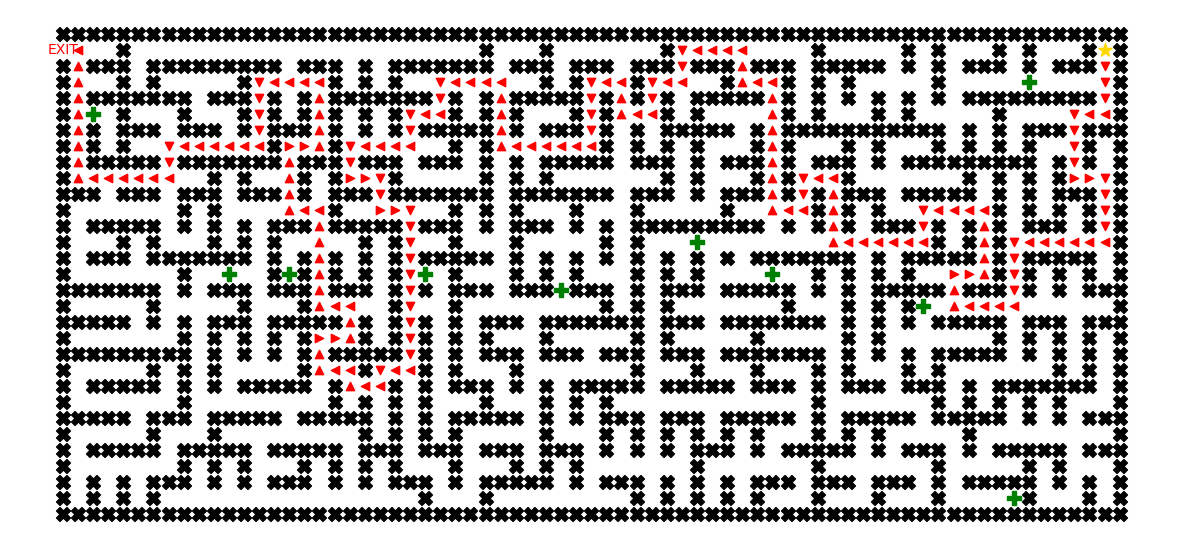

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Bonus point at position (x, y) = (15, 15) with point -8
Bonus point at position (x, y) = (3, 64) with point -2
Bonus point at position (x, y) = (15, 47) with point -12
Bonus point at position (x, y) = (15, 24) with point -20
Bonus point at position (x, y) = (15, 11) with point -30
Bonus point at position (x, y) = (29, 63) with point -15
Bonus point at position (x, y) = (5, 2) with point -14
Bonus point at position (x, y) = (13, 42) with point -17
Bonus point at position (x, y) = (17, 57) with point -70
Bonus point at position (x, y) = (16, 33) with point -2
Cost: 199


In [12]:
run_search_bonus(g3, GBFS, manhattan_heuristic, figsize=(15, 7))

### Greedy Best-first Search (Euclide)

Journey [(1, 69), (5, 2), (1, 0)]
Going from (1, 69) to (5, 2)
Result found! Keep going!
Going from (5, 2) to (1, 0)
Result not found, backtracking...
Going from (1, 69) to (1, 0)
Result found! Keep going!


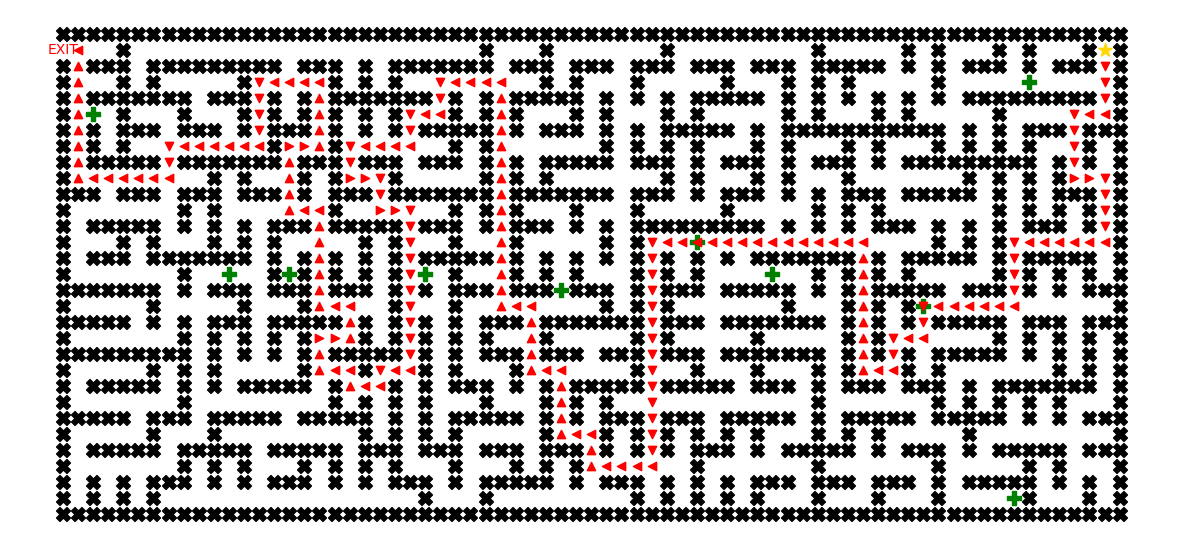

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Bonus point at position (x, y) = (15, 15) with point -8
Bonus point at position (x, y) = (3, 64) with point -2
Bonus point at position (x, y) = (15, 47) with point -12
Bonus point at position (x, y) = (15, 24) with point -20
Bonus point at position (x, y) = (15, 11) with point -30
Bonus point at position (x, y) = (29, 63) with point -15
Bonus point at position (x, y) = (5, 2) with point -14
Bonus point at position (x, y) = (13, 42) with point -17
Bonus point at position (x, y) = (17, 57) with point -70
Bonus point at position (x, y) = (16, 33) with point -2
Cost: 120


In [13]:
run_search_bonus(g3, GBFS, euclide_heuristic, figsize=(15, 7))

Với heuristic là Euclide, nó đã chọn một đường đi khác và lần này nó đã không ăn may được như lần trước nữa. Trên đường đi nó không vô tình ăn được điểm thưởng nào cả.

### A* (Manhattan)

Journey [(1, 69), (15, 11), (1, 0)]
Going from (1, 69) to (15, 11)
Result found! Keep going!
Going from (15, 11) to (1, 0)
Result found! Keep going!


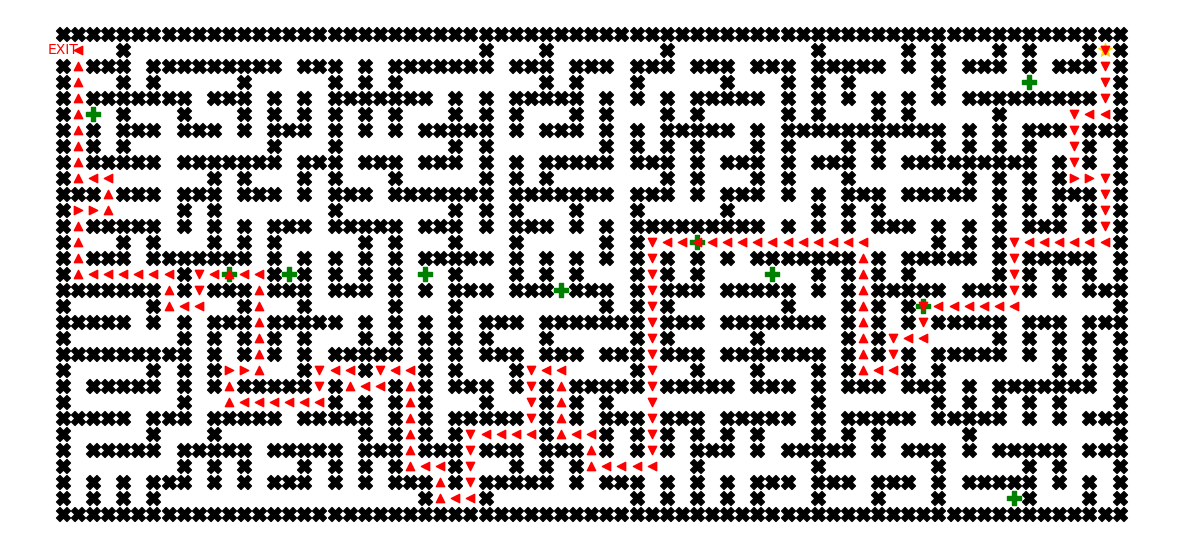

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Bonus point at position (x, y) = (15, 15) with point -8
Bonus point at position (x, y) = (3, 64) with point -2
Bonus point at position (x, y) = (15, 47) with point -12
Bonus point at position (x, y) = (15, 24) with point -20
Bonus point at position (x, y) = (15, 11) with point -30
Bonus point at position (x, y) = (29, 63) with point -15
Bonus point at position (x, y) = (5, 2) with point -14
Bonus point at position (x, y) = (13, 42) with point -17
Bonus point at position (x, y) = (17, 57) with point -70
Bonus point at position (x, y) = (16, 33) with point -2
Cost: 58


In [14]:
run_search_bonus(g3, Astar, euclide_heuristic, figsize=(15, 7))

Ở ví dụ này thì đương nhiên A* cũng tìm ra được đường đi ngắn nhất. Tuy nhiên, một số điểm thưởng mà nó nhân được là do "ăn may" chứ không phải nó chủ động tìm ra các điểm ấy (có thể nhìn vào kết quả của thuật toán).

Ta nhận thấy A* mặc dù là một thuật toán tìm đường rất tốt, và trong điều kiện thông thường sẽ luôn luôn tìm ra được đường đi ngắn nhất. Nhưng với map này, nó đã không chọn con đường $\text{START} \rightarrow (17, 57) \rightarrow \text{END}$ (điểm thưởng này có giá trị cực lớn, lên đến $-70$). Điều này là do $\text{START} \rightarrow (17, 57)$ có trọng số lớn hơn khoảng cách heuristic của 2 điểm đầu mút của nó, nên trọng số đã bị âm. A* không xử lý được trọng số âm nên em đã phải gán lại các giá trị cạnh âm thành 0. Vả lại khoảng cách từ  $\text{START} \rightarrow (17, 57)$ cũng quá lớn, không đủ "bù" lại. Đó là lý do A* đã không chọn con đường này để đi.

**Đó cũng chính là điểm hạn chế của phương pháp xử lý điểm thưởng này.** Nó không thực sự tìm được đường đi ngắn nhất nếu bản đồ có điểm thưởng, mà chỉ tìm được đường đi *có vẻ như là ngắn nhất* (đôi khi do "hên") với các bản đồ nhỏ, thông thoáng.

| Thuật toán | Chi phí |
|------------|---------|
| GBFS (M)   | 199     |
| GBFS (E)   | 120     |
| A* (E)     | 58      |